In [1]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [2]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [3]:
get_ipython().system('pip install db-dtypes')

In [4]:
get_ipython().system('pip install google-cloud-bigquery')
get_ipython().system('pip install google-cloud-bigquery[pandas]')

zsh:1: no matches found: google-cloud-bigquery[pandas]


In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [6]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [7]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [8]:
query = """
SELECT * 
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [9]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [10]:
X = data.drop("total_claims",1)
X = data.drop("week_number",1)
y = data["total_claims"]

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14996/3423902905.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("total_claims",1)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14996/3423902905.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("week_number",1)


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14996/1118215740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


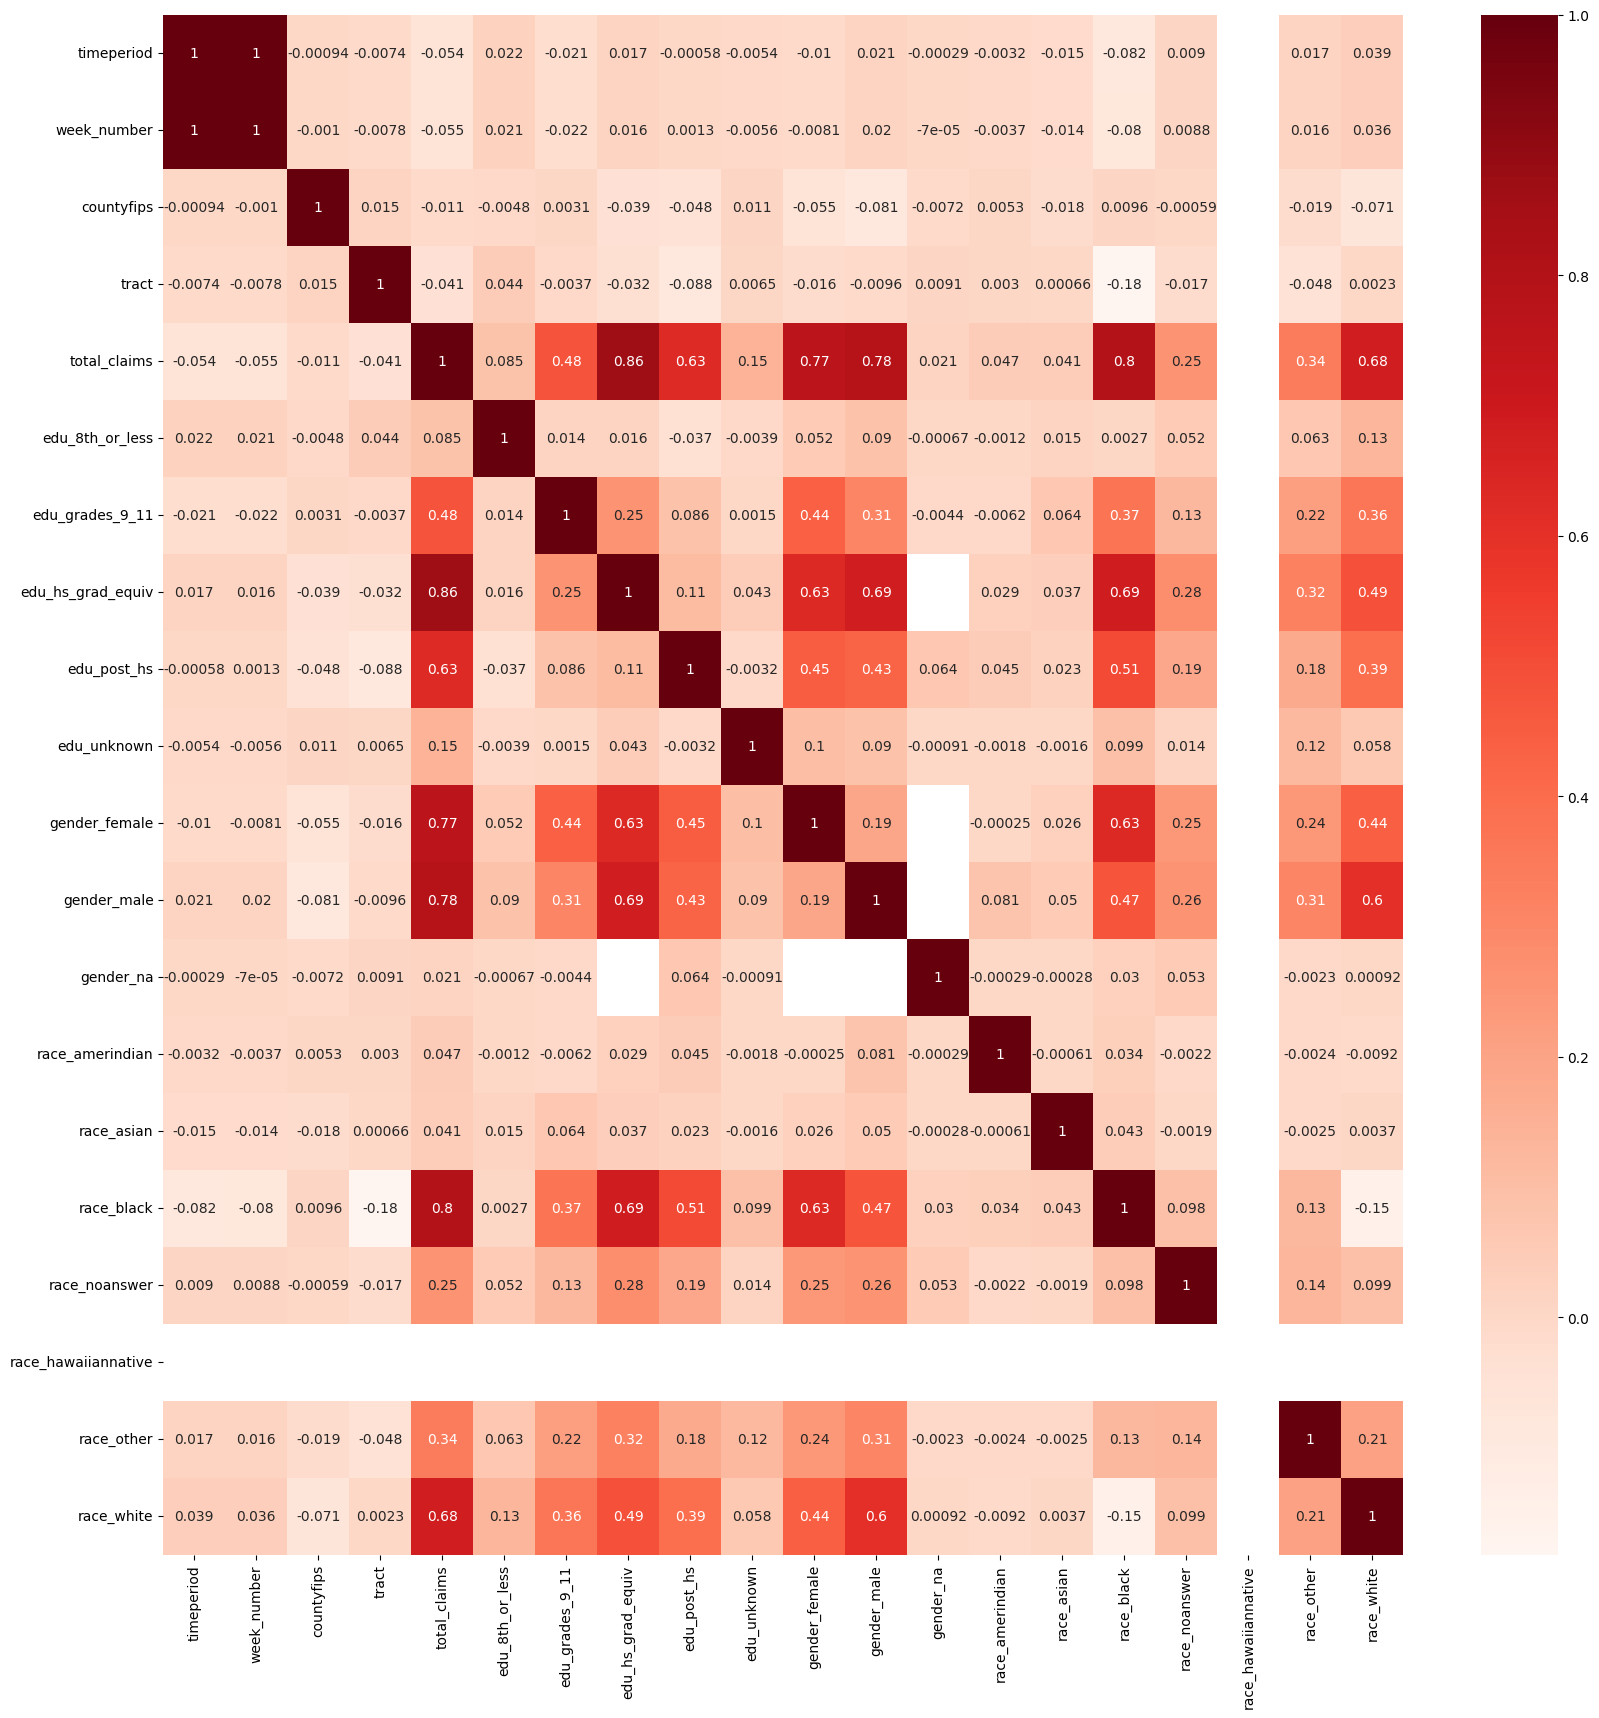

In [11]:
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
cor_target = abs(cor["total_claims"])
relevant_features = cor_target[cor_target>0.5]
print(relevant_features) # prints the correllation of columns to the total_claims column

total_claims         1.000000
edu_hs_grad_equiv    0.863481
edu_post_hs          0.629552
gender_female        0.767174
gender_male          0.783093
race_black           0.795195
race_white           0.683659
Name: total_claims, dtype: float64


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

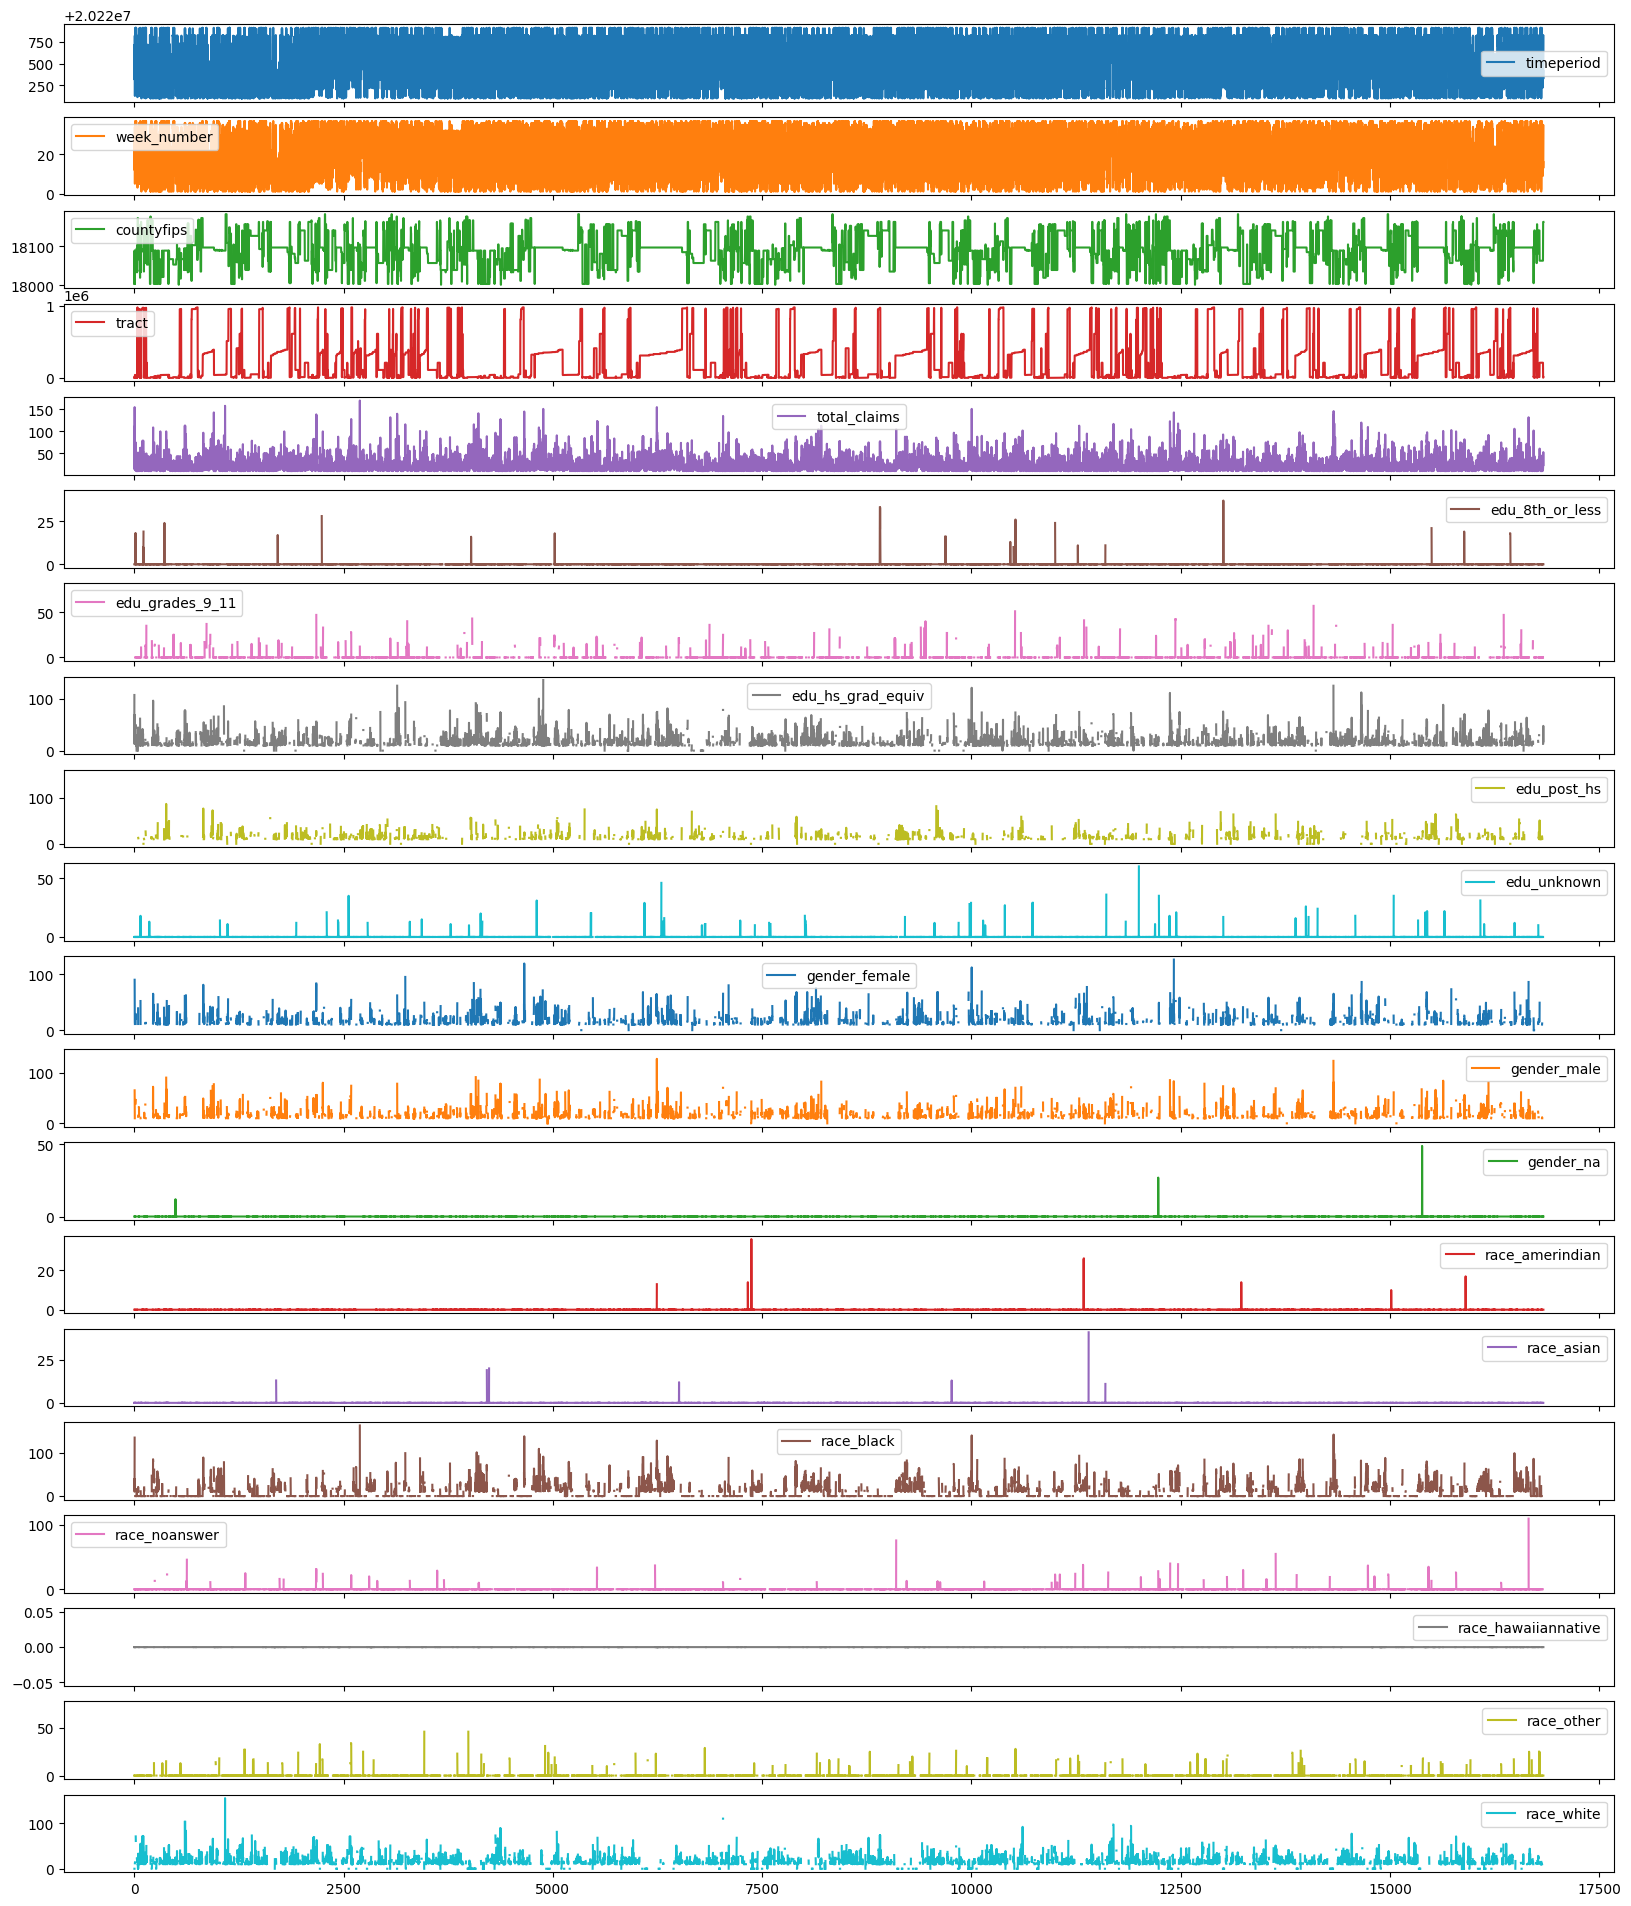

In [13]:
data.plot(subplots=True, figsize=(20,24))

In [14]:
min(data['week_number']),max(data['week_number'])

(1, 37)

In [15]:
data.dtypes #shows data types of columns

uu_id                     object
timeperiod                 Int64
week_number                Int64
countyfips                 Int64
tract                      Int64
tract_name                object
total_claims               Int64
edu_8th_or_less            Int64
edu_grades_9_11            Int64
edu_hs_grad_equiv          Int64
edu_post_hs                Int64
edu_unknown                Int64
top_category_employer1    object
top_category_employer2    object
top_category_employer3    object
gender_female              Int64
gender_male                Int64
gender_na                  Int64
race_amerindian            Int64
race_asian                 Int64
race_black                 Int64
race_noanswer              Int64
race_hawaiiannative        Int64
race_other                 Int64
race_white                 Int64
dtype: object

In [16]:
data = data.set_index('week_number')

In [17]:
data.index

Index([16, 12, 13, 29, 15, 34, 34,  5, 29, 24,
       ...
       25, 13, 18,  9, 17, 25, 35, 35, 13, 16],
      dtype='Int64', name='week_number', length=16833)

In [18]:
data.sample(5, random_state=0)

,uu_id,timeperiod,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
week_number,,,,,,,,,,,,,,,,,,,,,
14,06c78e49b4daedfeb808c42e58fb25e4,20220402,18063,210603,"Census Tract 2106.03, Hendricks County, Indiana",45,0,0,21,24,...,22,23,0,0,0,19,0,0,0,26
17,19c0ba2728a6971ff9c1301f3bf17f59,20220423,18065,976400,"Census Tract 9764, Henry County, Indiana",10,0,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,0,<NA>
9,dacd3e932f6546f12ba6b7f3e711a0ed,20220226,18097,310311,"Census Tract 3103.11, Marion County, Indiana",16,0,<NA>,<NA>,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,0
25,07306ce64b3496b7955efaaf7509d73c,20220618,18053,10800,"Census Tract 108, Grant County, Indiana",13,0,<NA>,<NA>,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,0,<NA>
32,89399fcb71863c561d2a2703d8bd4a15,20220806,18033,20300,"Census Tract 203, DeKalb County, Indiana",44,0,<NA>,37,<NA>,...,<NA>,<NA>,0,0,0,0,0,0,0,44


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

ValueError: could not convert string to float: 'f013068de98db1470bd986137a0c6d23'

In [20]:
get_ipython().run_line_magic('pip', 'install scikit-learn')

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [21]:
sns.set(rc={'figure.figsize':(11, 4)})

In [22]:
data['unemployment_data'].plot(linewidth=0.5);

KeyError: 'unemployment_data'

In [23]:
data['ironhacks-data.ironhacks_competition.unemployment_data'].plot(linewidth=0.5);

KeyError: 'ironhacks-data.ironhacks_competition.unemployment_data'

In [24]:
sns.set(rc={'figure.figsize':(11, 4)})
data['precipitation_data'].plot(linewidth=0.5);

KeyError: 'precipitation_data'